In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [49]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from time import time
import util

% matplotlib inline
plt.style.use("ggplot")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Assumptions

### Exploratory Data Analysis

In [3]:
#Loading data 
df = pd.read_csv("data/exercise_01_train.csv")

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [5]:
df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
39995,20.844737,-33.785846,-0.346804,-3.406866,34.771517,-57.951056,-0.288205,1.371940,3.335447,1.765670,...,-2.985304,7.312132,asia,5.964857,-13.061671,-8.062604,16.618593,-3.609543,0.631066,0
39996,1.666154,16.241028,12.623090,-6.168540,-10.650748,69.840299,-0.965011,-4.321631,3.071324,-0.209940,...,-5.842786,3.563600,asia,4.895863,-1.342384,-10.275539,14.046990,-0.320440,46.051387,0
39997,1.795836,-15.706685,1.009672,-0.887671,-11.580529,3.237055,0.541397,2.562310,-0.623586,3.300388,...,7.503255,-11.064043,america,6.783607,15.293008,-6.194035,-4.725605,-1.321478,27.836630,0
39998,50.168318,-4.272643,2.409248,-11.697615,39.234827,31.353302,1.416008,1.825775,2.027886,-3.753114,...,-1.411384,-17.587621,america,6.278226,-18.743967,-8.067506,5.258203,-2.623772,-15.550075,0
39999,-8.653274,10.572796,1.377445,-21.472814,-42.686853,28.893360,3.379456,-1.241659,-0.040278,0.612898,...,7.622624,-6.473851,asia,0.055730,-6.506186,12.434701,-6.001283,-5.340633,18.276723,1


In [6]:
print("Number of columns: {} \nNumber of rows: {}".format(df.shape[1], df.shape[0]))

Number of columns: 101 
Number of rows: 40000


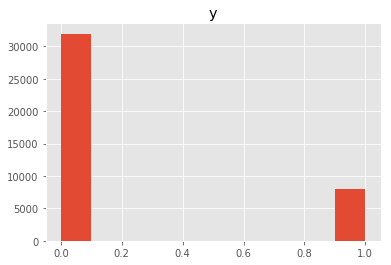

In [7]:
# Lets see the distribution of the label
df.hist(column="y")
plt.show()

In [8]:
categorical_cols = util.non_numerical_col(df)

## First iteration of model

In [9]:
df_num = df.copy()

In [10]:
# To start simple with the numerical portion of the data and removing all nans

In [11]:
df_num.dropna(inplace=True)
df_num.shape

(39199, 101)

In [12]:
print("{}% of the data is lost".format(round((df.shape[0]-df_num.shape[0])/df.shape[0]*100, 2)))

2.0% of the data is lost


In [13]:
# Dropping non-numerical features
df_num.drop(columns=categorical_cols, inplace=True)
df_num.shape

(39199, 95)

In [14]:
# There is clearly a skew towards the negative zero class, and the minority class is the positive class one,
# now lets check to see if how much of imbalance the classes are

In [15]:
y_dict = Counter(df_num["y"])
print("The minority class make up {}% of the data"
      .format(round(y_dict[1]/df_num.shape[0] *100)))

print("The majority class make up {}% of the data"
      .format(round(y_dict[0]/df_num.shape[0] *100)))

The minority class make up 20% of the data
The majority class make up 80% of the data


In [16]:
# Preparing train and test data for building model

In [17]:
y = df_num.pop("y")
X = df_num.values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_pred = rfc.predict(X_test)

In [21]:

precision, recall, accuracy, matrix = util.metric(y_test, y_pred)

In [22]:
# Confusion matrix
matrix

array([[ 648,   44],
       [1364, 7744]])

In [23]:

print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.32
Precision: 0.94


In [26]:
#predicted probabilities
scores = rfc.predict_proba(X_test)

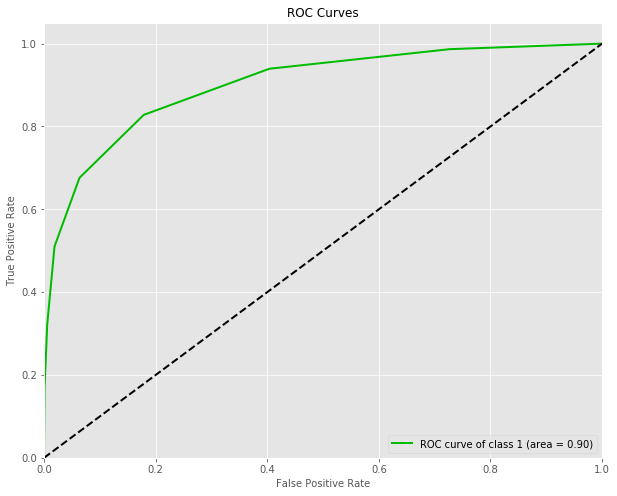

In [27]:
_=skplt.metrics.plot_roc(y_test, scores, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

In [28]:
# The model is favoring more of the majority class label in its prediction, 
# this is an indication of an imbalance class problem. Since the positive class is only 20% of the data,
# it is reflected in the low recall

## Second iteration of model

In [29]:
# There are a few thins wrong with our model, one is imbalance classes, 
# the other is we might have lost some information that may be important in 
# our prediction by dropping the categorical features. Let us try to incoporate 
# these features back into the dataset

In [30]:
# Taking a look at the contents the dropped features
for col in categorical_cols:
    print(pd.unique(df[col]), "\n")

['bmw' 'nissan' 'Honda' 'Toyota' 'volkswagon' 'tesla' 'chrystler' 'ford'
 'mercades' nan 'chevrolet'] 

['wed' 'thur' 'thurday' 'wednesday' 'friday' 'tuesday' 'monday' 'fri' nan] 

['$-54.1' '$-229.32' '$243.68' ... '$1215.91' '$-723.78' '$-426.49'] 

['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%' nan] 

['Jun' 'July' 'May' 'Aug' 'Apr' 'Mar' 'Oct' 'sept.' 'Nov' 'Feb' 'Dev' nan
 'January'] 

['euorpe' 'asia' 'america' nan] 



In [33]:
# Looking into the non-numeric attributes, these contain type of cars, days of the week, 
# dollar amount, percentage, month of the year, continent. Lets change the the dollar amount 
# and the percentage attributes to numerical values

In [32]:
util.regex(df, ["x41","x45"])

In [33]:
type(df["x45"][0])

numpy.float64

In [34]:
# Since there are few unique values in "x34", "x35", "x68" and "x93" it is a good idea to turn 
# them into dummy variables. But before doing that, observe that there are nan values. 
# Lets also see how much of the data is nan 

In [35]:
region = Counter(df["x93"])
cars = Counter(df["x34"])
days = Counter(df["x35"])
month = Counter(df["x68"])

In [36]:
print(region,"\n\n", cars,"\n\n", days,"\n\n", month)

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

 Counter({'volkswagon': 12572, 'Toyota': 10946, 'bmw': 7304, 'Honda': 5129, 'tesla': 2275, 'chrystler': 1223, 'nissan': 336, 'ford': 165, 'mercades': 32, 'chevrolet': 11, nan: 7}) 

 Counter({'wed': 14834, 'thurday': 13359, 'wednesday': 5891, 'thur': 4374, 'tuesday': 929, 'friday': 526, 'monday': 56, 'fri': 21, nan: 10}) 

 Counter({'July': 11088, 'Jun': 9279, 'Aug': 8155, 'May': 4788, 'sept.': 3466, 'Apr': 1641, 'Oct': 926, 'Mar': 409, 'Nov': 156, 'Feb': 54, 'Dev': 18, 'January': 11, nan: 9})


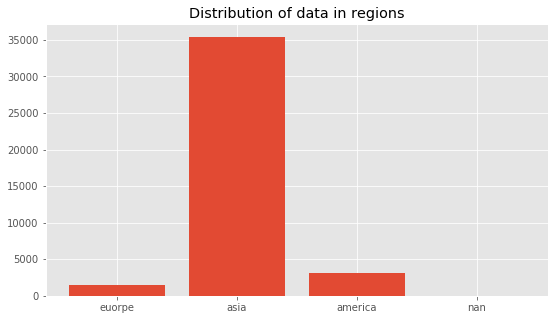

In [44]:
util.plot_cols(region, "regions")

In [40]:
print(region, "\n")
print("{}% of the data belong to asia category \n"
      .format(round(region["asia"]/sum(region.values())*100, 2)))
print("{}% of the data belong to asia category"
      .format(round(region["nan"]/sum(region.values())*100, 9)))

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

88.52% of the data belong to asia category 

0.0% of the data belong to asia category


In [41]:
# We can assume that the x93 is associated with three regions and a chunk of the the 
# category is asia (88.52%) with just 7 nan values and almost 0% of the data, this will 
# barely affect the model, it can be assummed to belong to the majority class 

In [41]:
# df["x93"][df["x93"].isna()] = "asia"

In [42]:
# Counter(df["x93"])

In [43]:
## Taking a look at the other three features

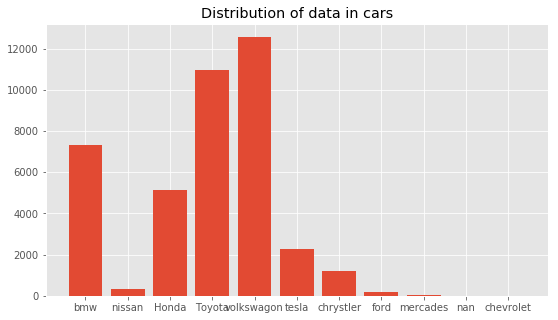

In [45]:
util.plot_cols(cars, "cars")

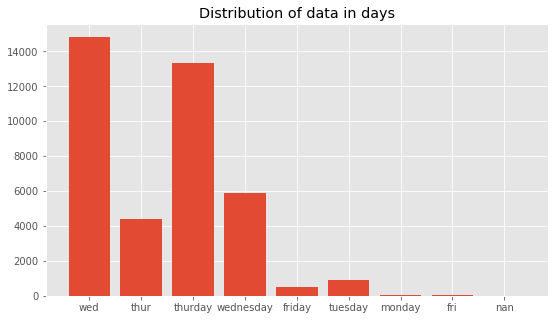

In [46]:
util.plot_cols(days, "days")

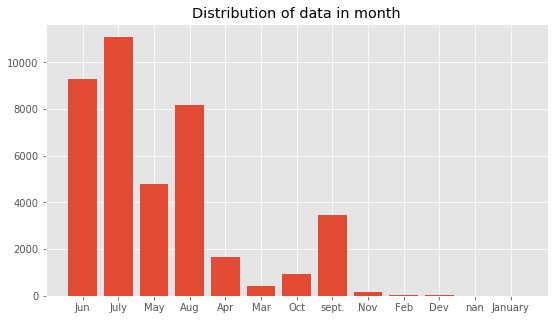

In [47]:
util.plot_cols(month, "month")

In [48]:
# Notice that in two of the plots, month and days there are duplicates in categories, 
# there are double entries of the month of january (as jun and January) and double entries 
# for wednesday/fiday as (wed and wednesday also fri and friday) as well as misspelling in thursday. 
# These categories will be merged as a single unique category. There are also mixed naming formats 
# used in days attribute (ie short and full) these will be changed for uniformity 

In [50]:
util.retructure_cols(df)

In [51]:
pd.unique(df["x35"])

array(['wed', 'thur', 'fri', 'tue', 'mon', nan], dtype=object)

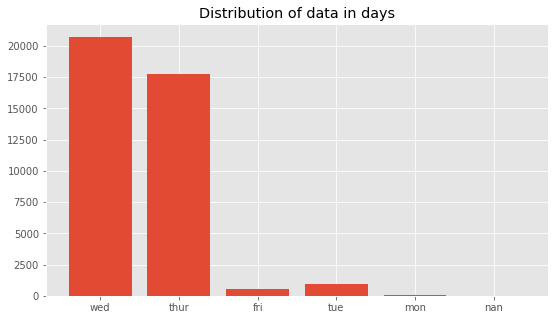

In [54]:
util.plot_cols(Counter(df["x35"]), "days")

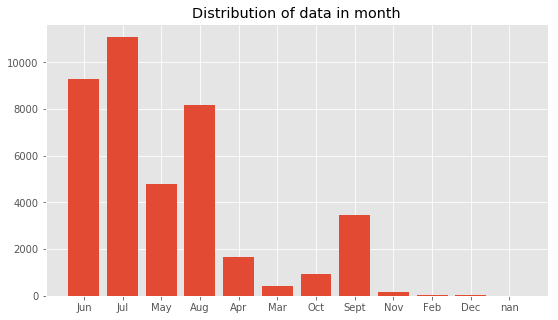

In [55]:
util.plot_cols(Counter(df["x68"]), "month")

In [56]:
# Now we can make these categorical attributs into one-in-hot encoding

In [57]:
df_dummy = pd.get_dummies(df, prefix=["x34","x35","x68","x93"])

In [58]:
df_dummy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,0,1,0,0,0,0,0,0,0,1
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,1,0,0,0,0,0,0,0,1,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1,0,0,0,0,0,0,0,1,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,0,0,0,1,0,0,0,0,1,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,1,0,0,0,0,0,0,0,1,0


In [59]:
df_dummy.shape

(40000, 126)

In [60]:
# Creating one-in-hot encoding have added 25 more features to the data
# Now the entire data is numerical, we can determine what subset from the feature will be relevant to a good model
# We can start by checking how much each feature correlates with the the label

In [61]:
df_corr = df_dummy.copy().corr()

In [62]:
df_corr.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
x68_Oct,0.112879,-0.025157,-0.068854,-0.073669,-0.000956,0.014476,-0.004334,-0.000688,0.067641,0.001672,...,-0.095334,-0.084670,-0.015647,-0.056767,-0.009633,1.000000,-0.047416,0.008289,-0.001939,-0.008474
x68_Sept,0.150365,-0.036598,-0.094202,-0.098149,-0.007896,0.006901,0.000032,0.002633,0.089547,-0.001965,...,-0.190745,-0.169408,-0.031306,-0.113579,-0.019273,-0.047416,1.000000,0.005047,-0.002005,-0.003554
x93_america,-0.002837,0.004870,-0.005386,-0.000074,-0.008254,0.002762,0.006983,0.005911,-0.006394,0.008608,...,-0.009620,-0.001175,-0.000985,0.000178,-0.000344,0.008289,0.005047,1.000000,-0.810009,-0.056526
x93_asia,0.002733,-0.005581,0.003540,-0.001718,0.006708,-0.000033,-0.001783,-0.005009,0.005605,-0.008206,...,0.011324,-0.001809,0.002294,-0.000594,0.001139,-0.001939,-0.002005,-0.810009,1.000000,-0.538225
x93_euorpe,0.000018,0.002518,0.001768,0.003200,0.000079,-0.003590,-0.007008,0.000188,-0.000856,0.001120,...,-0.005497,0.004977,-0.002402,0.000690,-0.001390,-0.008474,-0.003554,-0.056526,-0.538225,1.000000


In [64]:
# There are multiple features in the data and we will not create 
# individual vizualization to see the correlation. To understand the 
# correlation, we will select correlation value of each feature with the label 

In [65]:
df_y = df_corr.loc[["y"],:]

In [66]:
df_y[df_y.iloc[-1,:].sort_values(ascending=False).index]

,y,x58,x97,x1,x99,x79,x63,x72,x69,x78,...,x96,x21,x50,x66,x3,x22,x70,x41,x37,x75
y,1.0,0.18666,0.184344,0.101217,0.098397,0.09582,0.095792,0.095313,0.095173,0.094825,...,-0.091515,-0.092892,-0.093171,-0.096199,-0.096704,-0.097655,-0.104042,-0.181519,-0.195297,-0.2105


In [67]:
df_y[df_y.iloc[-1,:].sort_values(ascending=True).index]

,x75,x37,x41,x70,x22,x3,x66,x50,x21,x96,...,x78,x69,x72,x63,x79,x99,x1,x97,x58,y
y,-0.2105,-0.195297,-0.181519,-0.104042,-0.097655,-0.096704,-0.096199,-0.093171,-0.092892,-0.091515,...,0.094825,0.095173,0.095313,0.095792,0.09582,0.098397,0.101217,0.184344,0.18666,1.0


In [68]:
# Generally there is a week correlation both positively and negatively. 
# The feature with the most correction correlation x75 has a correlation value 
# of -0.2105 which is a weak correlation value. But 

#### Lets try resampling the data to balance the dataset

The data is not a large dataset, undersampling the data will lead to loss of information. The better approach will be oversampling the minority class to the same amount of the majority class. A good technique for this is using SMOTE algorithm to generate synthetic data.

In [69]:
df_dummy.dropna(inplace=True)

In [65]:
data = df_dummy.copy()
y = data.pop("y")
X = data.values

In [66]:
print("Original dataset shape %s" % Counter(y))

Original dataset shape Counter({0: 31347, 1: 7885})


In [67]:
sm = SMOTE(random_state=1)

In [68]:
X_res, y_res = sm.fit_resample(X, y)

In [69]:
print("Resampled dataset shape %s" % Counter(y_res))

Resampled dataset shape Counter({0: 31347, 1: 31347})


In [70]:
# Now the data is balanced, the a new model can be attempted

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=1)

In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
y_pred = rfc.predict(X_test)

In [74]:

precision, recall, accuracy, matrix = metric(y_test, y_pred)

In [75]:
# Confusion matrix
matrix

array([[6855,  206],
       [ 982, 7631]])

In [76]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.87
Precision: 0.97


In [77]:
#predicted probabilities
scores = rfc.predict_proba(X_test)

In [78]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)

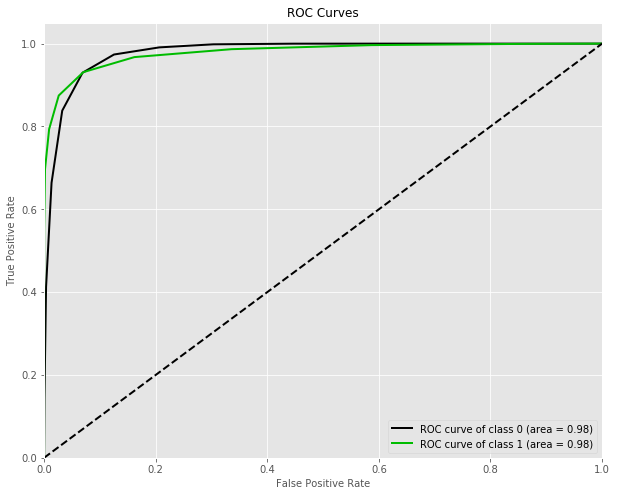

In [79]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))

In [80]:
# This is a much better result than the first iteration. The recall has improved 
# from 0.31 to 0.88, which in turn improved the True Positive Rate as thus seen in the ROC curve

In [81]:
important_cols = df_dummy.columns[np.argsort(rfc.feature_importances_)[::-1]][:50]
X_imp = df_dummy[important_cols].values
y_imp = df_dummy["y"]

In [82]:
print("Original dataset shape %s" % Counter(y_imp))

Original dataset shape Counter({0: 31347, 1: 7885})


In [83]:
sm = SMOTE(random_state=1)

In [84]:
X_res_imp, y_res_imp = sm.fit_resample(X_imp, y_imp)

In [85]:
print("Resampled dataset shape %s" % Counter(y_res))

Resampled dataset shape Counter({0: 31347, 1: 31347})


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_res_imp, y_res_imp, test_size=0.25, random_state=1)

In [87]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
y_pred = rfc2.predict(X_test)

In [89]:

precision, recall, accuracy, matrix = metric(y_test, y_pred)

In [90]:
# Confusion matrix
matrix

array([[7837,    0],
       [   0, 7837]])

In [91]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 1.0
Precision: 1.0


In [92]:
#predicted probabilities
scores = rfc2.predict_proba(X_test)

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)

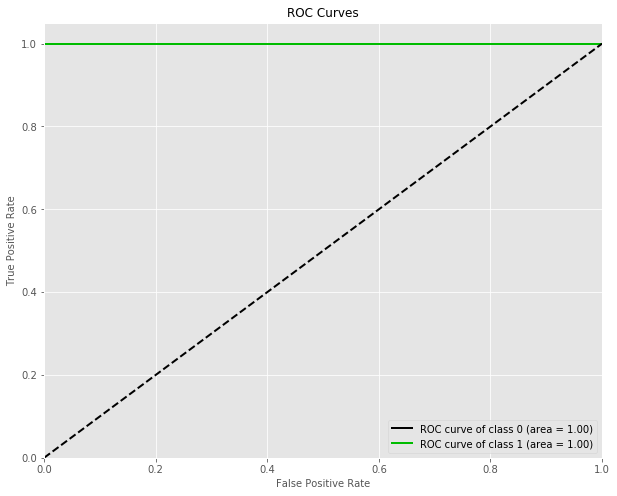

In [94]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))

## Third iteration of model

In [95]:
# Now there are multiple features and some of these can be hurting our result due to mult-colinearity. 
# Let us use principal component analysis to shrink these features

In [96]:
data2 = df_dummy.copy()
y = data2.pop("y")
X = data2.values

In [97]:
pca = PCA(n_components=15)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
percent_expl = pca.explained_variance_ratio_

In [99]:
percent_expl

array([9.22886187e-01, 2.65063124e-02, 1.86450398e-02, 7.65516809e-03,
       2.21921841e-03, 2.00201515e-03, 1.85398463e-03, 1.44527031e-03,
       1.37699513e-03, 1.29360125e-03, 1.19546414e-03, 1.15720333e-03,
       1.02487250e-03, 8.72393521e-04, 8.26512751e-04])

In [100]:
np.cumsum(percent_expl)

array([0.92288619, 0.9493925 , 0.96803754, 0.97569271, 0.97791193,
       0.97991394, 0.98176793, 0.9832132 , 0.98459019, 0.98588379,
       0.98707926, 0.98823646, 0.98926133, 0.99013373, 0.99096024])

In [101]:
X_trans = pca.transform(X)

In [102]:
X_trans.shape

(39232, 15)

In [103]:
print("Original dataset shape %s" % Counter(y))

Original dataset shape Counter({0: 31347, 1: 7885})


In [104]:
sm = SMOTE(random_state=1)

In [105]:
X_res3, y_res3 = sm.fit_resample(X_trans, y)

In [106]:
print("Resampled dataset shape %s" % Counter(y_res3))

Resampled dataset shape Counter({0: 31347, 1: 31347})


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_res3, y_res3, test_size=0.25, random_state=1)

In [108]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
y_pred = rfc.predict(X_test)

In [110]:

precision, recall, accuracy, matrix = metric(y_test, y_pred)

In [111]:
# Confusion matrix
matrix

array([[6661,  950],
       [1176, 6887]])

In [112]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.85
Precision: 0.88


In [113]:
#predicted probabilities
scores = rfc.predict_proba(X_test)

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)

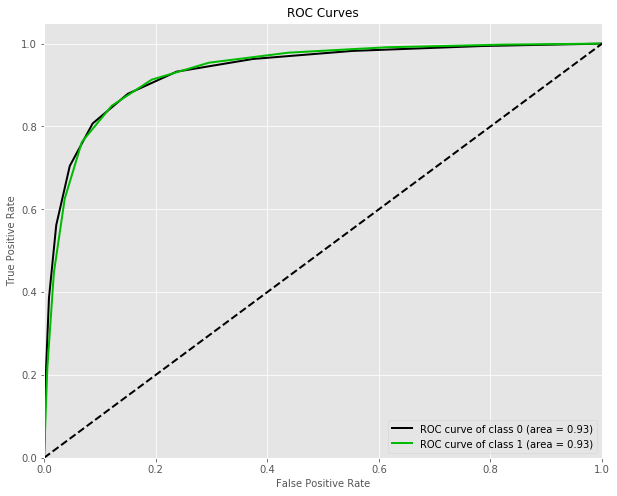

In [115]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))

In [116]:
# Clearly the second iteration has a better result. This is because PCA does not 
# select important feature, all unimportant features will be a part of one or more 
# pricipal components and as long as there are such features in the prncipal component, 
# they will contribute noise to the principal component. 

## Fourth iteration of model
It will be good to try a different classification model. Logistic regression is a good candidate, but there is a need to filter out unimportant features, introducing regularization will be a good idea. To do this with Logistic regression, Stochastic Gradient Descent algorithm will be applied.

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=1)

In [118]:
sgd = SGDClassifier(alpha=0.0001,loss="log", penalty="elasticnet", 
                    l1_ratio=0.5, n_jobs=-1)

In [119]:
sgd.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.5, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [120]:
pred = sgd.predict(X_test)

In [121]:

precision, recall, accuracy, matrix = metric(y_test, pred)

In [122]:
# Confusion matrix
matrix

array([[6511, 1491],
       [1326, 6346]])

In [123]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.83
Precision: 0.81


In [124]:
#predicted probabilities
scores = sgd.predict_proba(X_test)

In [125]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)

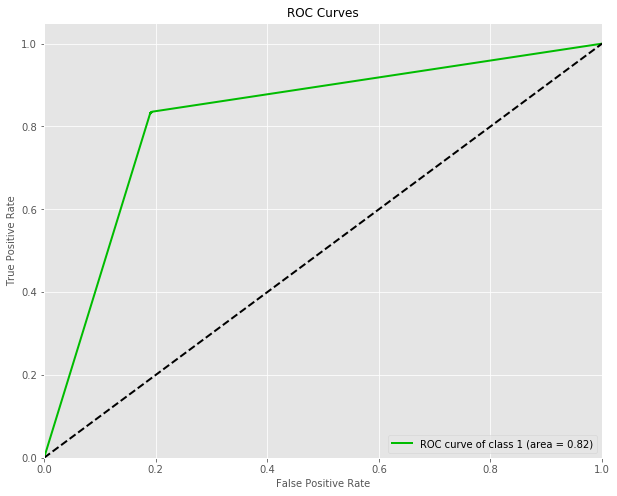

In [126]:
_=skplt.metrics.plot_roc(y_test, scores, classes_to_plot=[1],plot_micro=False, plot_macro=False, figsize=(10,8))

In [157]:
param_grid = {"alpha": [0.1, 0.01, 0.001, 0.00001],
              "loss": ["log", "modified_huber"],
              "penalty": ["l1","l2","elasticnet"]}

# run grid search
start = time()
grid_search = GridSearchCV(SGDClassifier(), param_grid=param_grid, n_jobs=-1)

grid_search.fit(X_train, y_train)
end = time()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [160]:
sgd2 = grid_search.best_estimator_
sgd2

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
       max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)

In [161]:
pred = sgd2.predict(X_test)

In [162]:

precision, recall, accuracy, matrix = metric(y_test, pred)

In [163]:
# Confusion matrix
matrix

array([[6591, 1608],
       [1246, 6229]])

In [164]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.84
Precision: 0.8


## Fifth iteration of model

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=1)

In [128]:
gb = GradientBoostingClassifier()

In [129]:
gb.fit(X_train, y_train)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [130]:
y_pred = gb.predict(X_test)

In [131]:

precision, recall, accuracy, matrix = metric(y_test, y_pred)

In [132]:
# Confusion matrix
matrix

array([[7093,  225],
       [ 744, 7612]])

In [133]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.91
Precision: 0.97


In [134]:
#predicted probabilities
scores = gb.predict_proba(X_test)

In [135]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)

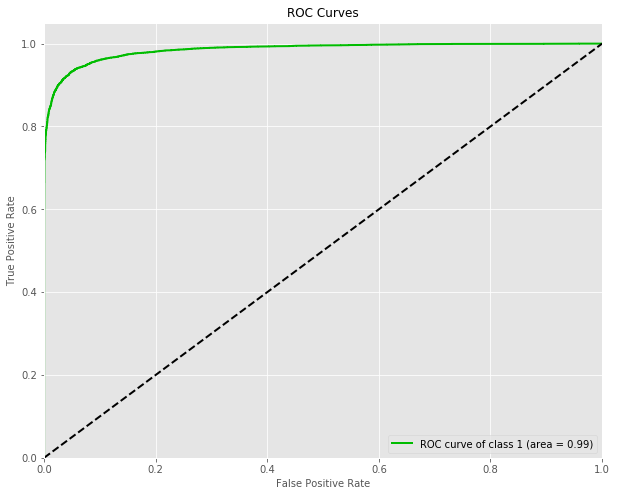

In [136]:
_=skplt.metrics.plot_roc(y_test, scores, classes_to_plot=[1],plot_micro=False, plot_macro=False, figsize=(10,8))

In [137]:
important_cols = df_dummy.columns[np.argsort(gb.feature_importances_)[::-1]][:50]
X_imp = df_dummy[important_cols].values
y_imp = df_dummy["y"]

In [138]:
print("Original dataset shape %s" % Counter(y_imp))

Original dataset shape Counter({0: 31347, 1: 7885})


In [139]:
sm = SMOTE(random_state=1)

In [140]:
X_res_imp, y_res_imp = sm.fit_resample(X_imp, y_imp)

In [141]:
print("Resampled dataset shape %s" % Counter(y_res))

Resampled dataset shape Counter({0: 31347, 1: 31347})


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_res_imp, y_res_imp, test_size=0.25, random_state=1)

In [143]:
gb2 = GradientBoostingClassifier()
gb2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [144]:
y_pred = gb2.predict(X_test)

In [145]:

precision, recall, accuracy, matrix = metric(y_test, y_pred)

In [146]:
# Confusion matrix
matrix

array([[7837,    0],
       [   0, 7837]])

In [147]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 1.0
Precision: 1.0


In [148]:
#predicted probabilities
scores = gb2.predict_proba(X_test)

In [149]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores[:,1], pos_label=1)

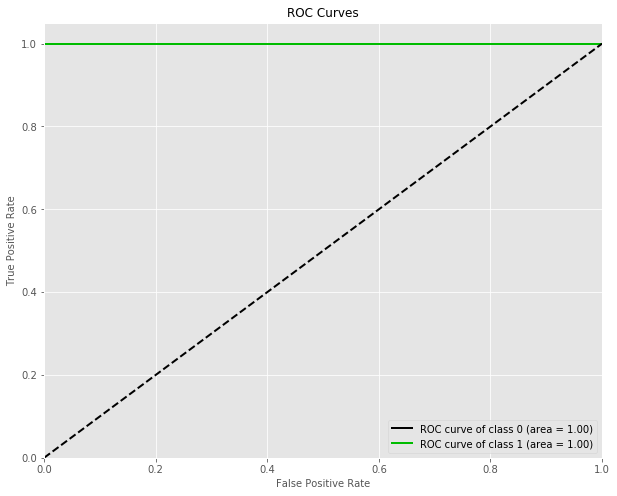

In [150]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))

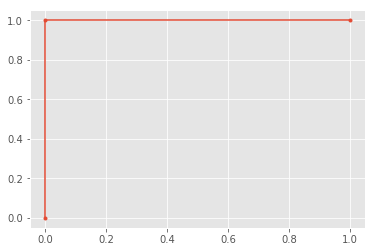

In [151]:
plt.plot(fpr, tpr, marker='.')

In [152]:
important_cols

Index(['x35_mon', 'x37', 'x75', 'x45', 'x68_Feb', 'x35_tue', 'x68_Jul', 'x58',
       'x97', 'x34_tesla', 'x41', 'x34_Honda', 'x99', 'x51', 'x53', 'x10',
       'x63', 'x44', 'x83', 'x12', 'x34_Toyota', 'x21', 'x5', 'x66', 'x96',
       'x68_Apr', 'x72', 'x1', 'x70', 'x40', 'x50', 'x74', 'x4', 'x78', 'x2',
       'x43', 'x3', 'x85', 'x22', 'x57', 'y', 'x56', 'x19', 'x79', 'x8', 'x0',
       'x73', 'x47', 'x33', 'x95'],
      dtype='object')